<a href="https://colab.research.google.com/github/Ganesh-Esc/DL-Basics/blob/main/DL_MultiLayerPerceptron.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!mamba install -qy numpy==1.22.3 matplotlib==3.5.1 tensorflow==2.9.0 opencv-python==4.5.5.62

/bin/bash: line 1: mamba: command not found


In [2]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import random

from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score,classification_report

The scikit-learn library is well-known for providing robust and efficient tools for Machine Learning and Statistical Learning such as regression, classification, and clustering. It also contains an interface that allows us to work with neural networks, which is the **Multi-layer Perceptron (MLP)** class.

A Multilayer Perceptron (MLP) is a fully connected class of feedforward artificial neural network (ANN). It consists of at least three layers of nodes: an input layer, a hidden layer, and an output layer. Except for the input layer, each layer contains nodes (neurons) that use nonlinear activation functions such as ReLu to learn complex and abstract features in the input.

Class **MLPClassifier** utilizes a supervised learning technique called backpropagation for training. Its multiple layers and non-linear activation distinguish a MLP model from a linear model, as it can distinguish data that is not linearly separable.


In [4]:
digits=pd.read_csv('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML311-Coursera/labs/Module1/L1/data/digits.csv')
digits.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
labels=digits['label']
digits=np.array(digits.drop('label',axis=1)).astype('float')
digits.shape,labels.shape

((42000, 784), (42000,))

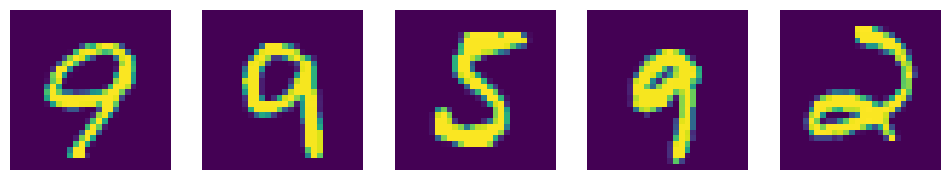

In [6]:
plt.figure(figsize=(12,4))
for i in range(5):
    plt.subplot(1, 5, i+1)
    plt.imshow(random.choice(digits).reshape(28,28))
    plt.axis("off")

In [7]:
split =0.7,0.3
digits/=255.0
split_ind=int(len(digits)*split[0])
X_train,X_test,y_train,y_test=digits[:split_ind],digits[split_ind:],labels[:split_ind],labels[split_ind:]
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((29399, 784), (12601, 784), (29399,), (12601,))

In [8]:
model=MLPClassifier().fit(X_train,y_train)
y_pred=model.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98      1263
           1       0.98      0.99      0.98      1410
           2       0.98      0.97      0.97      1226
           3       0.96      0.97      0.97      1317
           4       0.97      0.98      0.97      1184
           5       0.97      0.96      0.97      1135
           6       0.98      0.99      0.98      1227
           7       0.97      0.97      0.97      1332
           8       0.97      0.97      0.97      1235
           9       0.96      0.95      0.96      1272

    accuracy                           0.97     12601
   macro avg       0.97      0.97      0.97     12601
weighted avg       0.97      0.97      0.97     12601



for MLPClassifier() by default
we can use grid search cross validation to update the parameters
1.   By default hidden layer size= total layers-2
2.   max iterations =200

*   learning rate =0.001





In [9]:
parameters = {'hidden_layer_sizes':[50, 100, 200],
              'alpha': [0.001, 0.01, 0.1],
              'max_iter': [200, 500, 800],
              'learning_rate_init':[0.0001, 0.001, 0.01, 0.1]}
model = MLPClassifier()
clf = RandomizedSearchCV(estimator=model, param_distributions=parameters, cv=5)
clf.fit(X_train[:3000], y_train[:3000]) # reduce the train set size to shorten the training time

print("The best parameter values found are:\n")
print(clf.best_params_)

# store the best model found in "bestmodel"
bestmodel = clf.best_estimator_

The best parameter values found are:

{'max_iter': 200, 'learning_rate_init': 0.01, 'hidden_layer_sizes': 200, 'alpha': 0.001}


The accuracy score of the best model is 0.9396079676216174



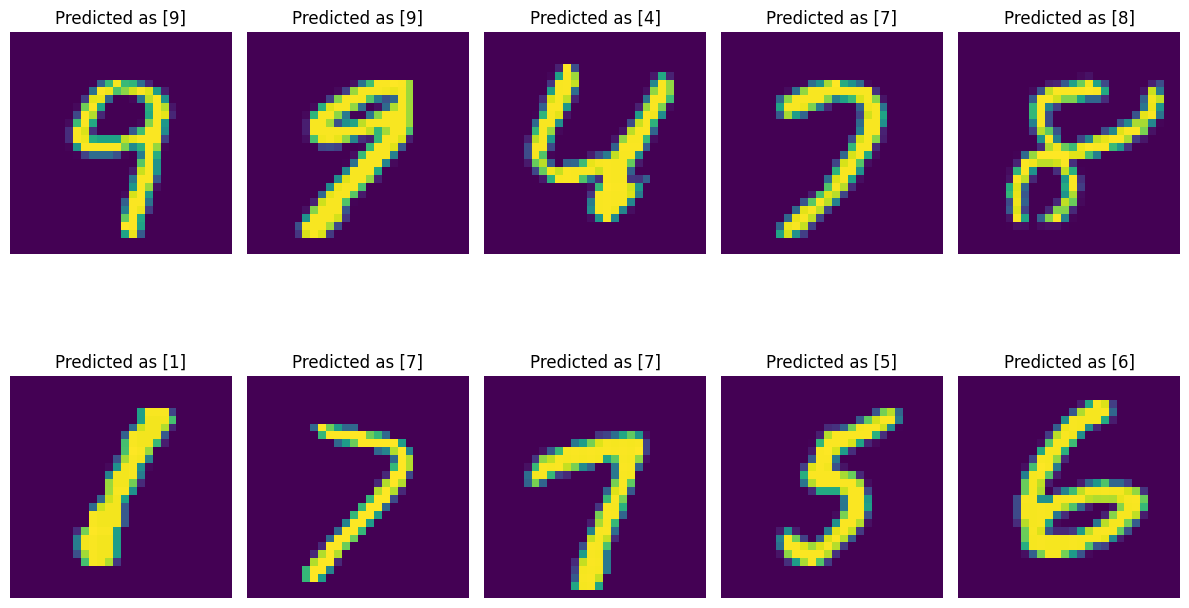

In [10]:
y_pred = bestmodel.predict(X_test)
print(f"The accuracy score of the best model is {accuracy_score(y_test, y_pred)}\n")

plt.figure(figsize=(12,8))
for i in range(10):
    plt.subplot(2, 5, i+1)
    sample = random.choice(X_test)
    plt.imshow(sample.reshape(28,28))
    pred = bestmodel.predict(sample.reshape(1,-1))
    plt.title(f"Predicted as {pred}")
    plt.axis("off")

plt.tight_layout()